In [1]:
#pip install kmodes

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes

In [27]:
# Read in data
data = pd.read_csv('./LimitedData.csv')
data.head(100)

,user_id,order_id,product_id,product_name,department_id,department,aisle_id,aisle,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,Organic vs Non Organic,Food Group,Vegan Friendly
0,1424,38817,34126,Organic Italian Parsley Bunch,4,produce,16,fresh herbs,11,4,9,8,13,1,Organic,Vegitarian,Yes
1,1424,38817,30391,Organic Cucumber,4,produce,83,fresh vegetables,11,4,9,8,11,1,Organic,Vegitarian,Yes
2,1424,38817,37646,Organic Gala Apples,4,produce,24,fresh fruits,11,4,9,8,9,1,Organic,Vegitarian,Yes
3,1424,38817,43122,Organic Bartlett Pear,4,produce,24,fresh fruits,11,4,9,8,8,1,Organic,Vegitarian,Yes
4,1424,38817,21137,Organic Strawberries,4,produce,24,fresh fruits,11,4,9,8,18,1,Organic,Vegitarian,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1424,493796,5876,Organic Lemon,4,produce,24,fresh fruits,4,4,10,7,24,1,Organic,Vegitarian,Yes
96,1424,493796,21616,Organic Baby Arugula,4,produce,123,packaged vegetables fruits,4,4,10,7,25,1,Organic,Vegitarian,Yes
97,1424,493796,40706,Organic Grape Tomatoes,4,produce,123,packaged vegetables fruits,4,4,10,7,17,1,Organic,Vegitarian,Yes
98,1424,493796,21137,Organic Strawberries,4,produce,24,fresh fruits,4,4,10,7,16,1,Organic,Vegitarian,Yes


In [8]:
# Keep a copy of data
data_copy = data.copy()

In [28]:
# Data processing
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
data.head(10)

,user_id,order_id,product_id,product_name,department_id,department,aisle_id,aisle,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,Organic vs Non Organic,Food Group,Vegan Friendly
0,0,46,212,158,2,11,6,19,10,4,9,8,12,1,1,1,1
1,0,46,185,135,2,11,31,20,10,4,9,8,10,1,1,1,1
2,0,46,239,143,2,11,10,18,10,4,9,8,8,1,1,1,1
3,0,46,276,121,2,11,10,18,10,4,9,8,7,1,1,1,1
4,0,46,124,202,2,11,10,18,10,4,9,8,17,1,1,1,1
5,0,46,260,151,2,11,52,38,10,4,9,8,29,1,1,1,1
6,0,46,245,215,2,11,31,20,10,4,9,8,27,1,1,1,1
7,0,46,214,118,2,11,31,20,10,4,9,8,23,0,1,1,1
8,0,46,138,221,2,11,31,20,10,4,9,8,18,1,1,1,1
9,0,46,307,156,2,11,10,18,10,4,9,8,16,1,1,1,1


In [29]:
# Using K-Mode with "Cao" initialization
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 761, cost: 458545.0


In [30]:
# Predicted Clusters
fitClusters_cao

array([0, 0, 0, ..., 1, 1, 1], dtype=uint16)

In [31]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = data.columns

# Mode of the clusters
clusterCentroidsDf

,user_id,order_id,product_id,product_name,department_id,department,aisle_id,aisle,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,Organic vs Non Organic,Food Group,Vegan Friendly
0,7,2370,148,16,2,11,10,18,44,5,9,3,2,1,0,1,1
1,37,224,146,303,9,5,50,54,53,1,11,4,4,1,1,1,1


In [32]:
# Using K-Mode with "Huang" initialization
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3657, cost: 469750.0


In [33]:
# Predicted clusters
fitClusters_huang

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [34]:
# Choosing K by comparing Cost against each K
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 491973.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 761, cost: 458545.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 866, cost: 443067.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1025, cost: 435221.0
Run 1, iteration: 2/100, moves: 2, cost: 435221.0


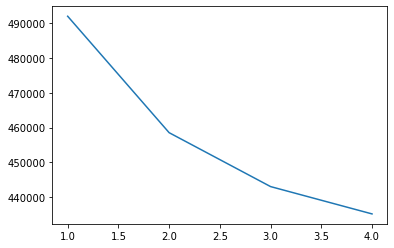

In [35]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [36]:
# Choosing K=5
km_cao = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1058, cost: 427277.0
Run 1, iteration: 2/100, moves: 55, cost: 427277.0


In [37]:
# Combining the predicted clusters with the original DF.
data = data_copy.reset_index()

In [38]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([data, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)
combinedDf.head()

,user_id,order_id,product_id,product_name,department_id,department,aisle_id,aisle,Organic vs Non Organic,Food Group,Vegan Friendly,cluster_predicted
0,1424,1249751,48679,Organic Garnet Sweet Potato (Yam),4,produce,83,fresh vegetables,Organic,Vegitarian,Yes,0
1,1424,1249751,26209,Limes,4,produce,24,fresh fruits,Non-Organic,Vegitarian,Yes,2
2,1424,1249751,47209,Organic Hass Avocado,4,produce,24,fresh fruits,Organic,Vegitarian,Yes,0
3,1424,1249751,38383,Organic White Onions,4,produce,83,fresh vegetables,Organic,Vegitarian,Yes,0
4,1424,1249751,5876,Organic Lemon,4,produce,24,fresh fruits,Organic,Vegitarian,Yes,0


In [22]:
# Cluster Identification
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29395 entries, 0 to 41226
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   user_id                 29395 non-null  int64 
 1   order_id                29395 non-null  int64 
 2   product_id              29395 non-null  int64 
 3   product_name            29395 non-null  object
 4   department_id           29395 non-null  int64 
 5   department              29395 non-null  object
 6   aisle_id                29395 non-null  int64 
 7   aisle                   29395 non-null  object
 8   Organic vs Non Organic  29395 non-null  object
 9   Food Group              29395 non-null  object
 10  Vegan Friendly          29395 non-null  object
 11  cluster_predicted       29395 non-null  uint16
dtypes: int64(5), object(6), uint16(1)
memory usage: 2.7+ MB


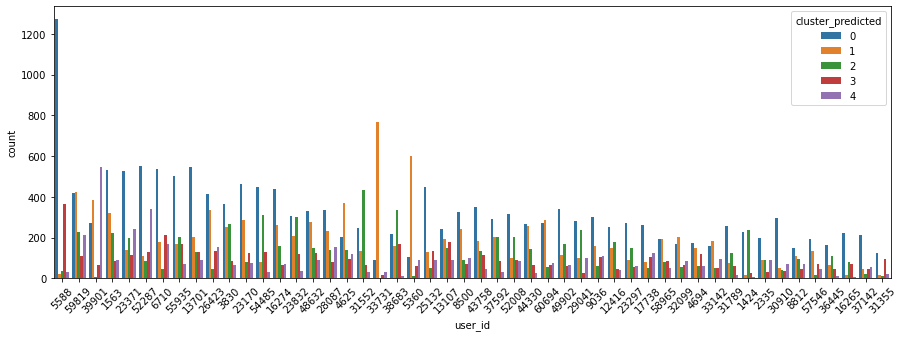

In [39]:
import seaborn as sns

plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['user_id'],order=combinedDf['user_id'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.xticks(rotation = 45)
plt.show()

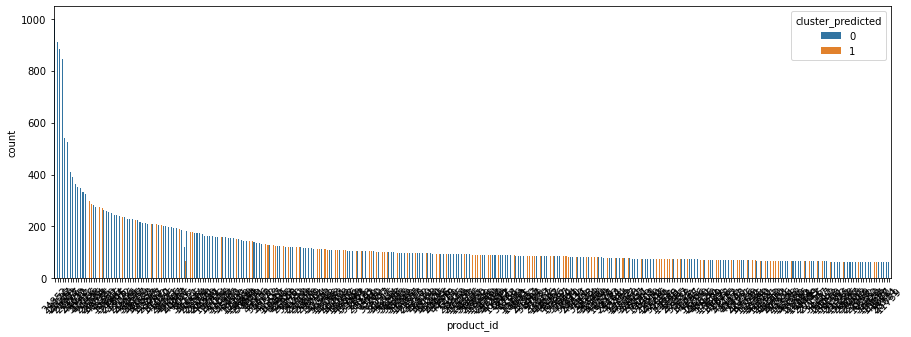

In [24]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['product_id'],order=combinedDf['product_id'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.xticks(rotation = 45)
plt.show()

In [25]:
combinedDf.to_csv('./clustered_data.csv', index=False, header=True)